# First Look: Pedestrian Data

Data from [Hystreet](https://hystreet.com/)

In [47]:
import pandas as pd
import pickle

## Mannheim (Planken Ost) - 2020

In [48]:
df = pd.read_csv("../Daten/Pedestrians/mannheim-planken (ost)-2020-daily.csv",sep=";")
df

,location,time of measurement,weekday,pedestrians count,temperature in ºc,weather condition,incidents
0,"Planken (Ost), Mannheim",2020-01-01 00:00:00 +0100,Wednesday,8114,3.0,clear-day,NaN
1,"Planken (Ost), Mannheim",2020-01-02 00:00:00 +0100,Thursday,25399,3.0,partly-cloudy-day,NaN
2,"Planken (Ost), Mannheim",2020-01-03 00:00:00 +0100,Friday,26111,9.0,rain,NaN
3,"Planken (Ost), Mannheim",2020-01-04 00:00:00 +0100,Saturday,32381,8.0,rain,NaN
4,"Planken (Ost), Mannheim",2020-01-05 00:00:00 +0100,Sunday,6777,7.0,partly-cloudy-day,NaN
...,...,...,...,...,...,...,...
364,"Planken (Ost), Mannheim",2020-12-27 00:00:00 +0100,Sunday,1618,6.0,rain,NaN
365,"Planken (Ost), Mannheim",2020-12-28 00:00:00 +0100,Monday,4138,7.0,rain,NaN
366,"Planken (Ost), Mannheim",2020-12-29 00:00:00 +0100,Tuesday,4875,5.0,rain,NaN
367,"Planken (Ost), Mannheim",2020-12-30 00:00:00 +0100,Wednesday,4466,5.0,rain,NaN


### Convert time to python datetime

In [49]:
import datetime as dt

for i,row in df.iterrows():
    time = row["time of measurement"]
    time = time.split()[0]
    dtime = dt.datetime.fromisoformat(time)
    df.at[i,"time of measurement"] = dtime

df.head()

,location,time of measurement,weekday,pedestrians count,temperature in ºc,weather condition,incidents
0,"Planken (Ost), Mannheim",2020-01-01 00:00:00,Wednesday,8114,3.0,clear-day,NaN
1,"Planken (Ost), Mannheim",2020-01-02 00:00:00,Thursday,25399,3.0,partly-cloudy-day,NaN
2,"Planken (Ost), Mannheim",2020-01-03 00:00:00,Friday,26111,9.0,rain,NaN
3,"Planken (Ost), Mannheim",2020-01-04 00:00:00,Saturday,32381,8.0,rain,NaN
4,"Planken (Ost), Mannheim",2020-01-05 00:00:00,Sunday,6777,7.0,partly-cloudy-day,NaN


### How many incidents are there?

In [50]:
df['incidents'].notnull().values.sum()

0

### Is a day missing?

In [66]:
times = set(df['time of measurement'].tolist())

flag = True
c_day = dt.datetime(2020,1,1)

# 2020 ist Schaltjahr
for i in range(366):
    if c_day not in times:
        print(f"Day {c_day} is missing!")
        flag = False
    c_day += datetime.timedelta(days=1)

if flag:
    print("No day ist missing!")

No day ist missing!


### Plot Pedestrians per Day

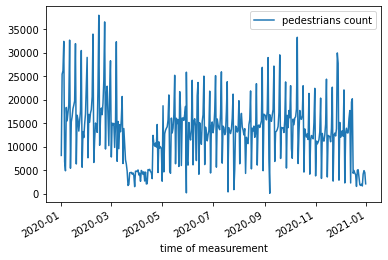

In [67]:
import matplotlib.pyplot as plt

df.plot(x ='time of measurement', y='pedestrians count')
plt.show()